# Lecture 7: Introduction to Sorting and Searching

## Topics
* Sorting algorithms - Bubble sort again, Merge Sort
* Searching algorithms - Linear search,  Bisection search 

## Reading
* 12.2 of Guttag 
* https://visualgo.net/en/sorting?slide=1 -- visualize some algorithms

# Sorting

<b>Sorting</b> refers to arranging elements in a collection according to some order. It is one of the major algorithmic problems discussed in computer science. To sort a list of numbers, the goal is to either put them in ascending or descending order.

## Bubble sort

One of the simplest sorting algorithms is <b> bubble sort </b>. This method works by swapping elements in a list until each element is in its correct position. To put the algorithm in words:

* Start at the front of the list.
* Compare two neighboring elements in a list.
    * If the elements are out of order, swap them.
* Continue to end of the list
* If at least one swap was made, repeat the process.
* Repeat starting until no swaps are made. 

The larger numbers will "bubble" down to the bottom of the list. 

In [1]:
def bubble_sort(lst):
    """ sorts list in ascending order using bubble sort algorithm"""
    n = len(lst)
    
    # flag that keeps track if any lst[left] > lst[right] 
    swapped = False
    
    # go through each entry in list
    for left in range(n):
        
        # check all elements to the right of it
        for right in range(left, n):
            
            # if it is out of order 
            if lst[left] > lst[right]:
                # set swapped flag to True
                swapped = True
                
                # swap elements
                tmp = lst[left]
                lst[left]  = lst[right]
                lst[right] = tmp
                
        if not swapped:
            # no swaps were made, then list is sorted
            return

From Lecture 5, we saw that because of the two `for` loops, this algorithm is $O(n^2)$. Pretty slow. Imagine if we had a list of 100,000 elements (that's not even very big).

In [6]:
L = [66, 12, 88, 4, 34, 98, 65, 68, 86, 54, 39, 56, 3, 13, 14, 49]

In [7]:
bubble_sort(L)
print(L)

[3, 4, 12, 13, 14, 34, 39, 49, 54, 56, 65, 66, 68, 86, 88, 98]


# Merge Sort
Here is a much better sorting algorithm that is based on divide-and-conquer approach. Sorting a list of size $\frac{N}{2}$ should be easier than sorting a list of size $N$. If we split our list into two equal-sized sublists, then sorting the two sublists should be easier.

Then, we just have to combine the two sorted sublists. 

Here is the algorithm outline:

* Split list into left_list and right_list
* Sort the left_list.
* Sort the right_list.
* Merge the two sorted lists. 

This looks like a great candidate for a recursive function. Let's call our function `merge_sort`

<b> Base case </b> A list with only 1 or 0 elements is already sorted.
<b> Recursive case </b> Split the list into left_list, right_list. Call`merge_sort(left_list)` and `merge_sort(right_list)`. Merge the sorted lists. 

In [2]:
def merge_sort(lst):
    """ Use the Merge sort algorithm to sort a list"""
    
    n = len(lst)

    if n < 2:
        return lst
    
    # Sort left and right
    left_lst = merge_sort(lst[:n//2])
    right_lst = merge_sort(lst[n//2:])
    
    # Merge the two
    merged = []
    
    ii = 0
    jj = 0
    while ii < len(left_lst) and jj < len(right_lst):
        if left_lst[ii] < right_lst[jj]:
            merged.append(left_lst[ii])
            ii = ii + 1
        else:
            merged.append(right_lst[jj])
            jj = jj + 1
    
    while ii < len(left_lst):
        merged.append(left_lst[ii])
        ii = ii + 1
        
    while jj < len(right_lst):
        merged.append(right_lst[jj])
        jj = jj + 1
    
    return merged

In [6]:
L = list(np.random.randint(0, 10, 10))
print(L)
L = merge_sort(L)
print(L)

[4, 9, 4, 8, 9, 0, 0, 1, 5, 5]
[0, 0, 1, 4, 4, 5, 5, 8, 9, 9]


This algorithm runs in $O(n \log n)$.

Example

L = [0, 9, 0, 7, 2, 0, 3, 6]

left_lst = [0, 9, 0, 7]

        * Recursive call will split into [0, 9] and [0, 7]
right_lst = [ 2, 0, 3, 6]

        * Recursive call will split into [2, 0] and [3, 6]


The run time of merge sort is actually the best a sorting algorithm can be.

# Searching

<b>Searching</b> refers to when you have a collection of items and you are looking for the items that match a criteria. We've already been doing some version of searching -- linear searchings in lists, exhaustive/brute-force searching for a numerical answer, and using an algorithm like the bisection method to find a numerical answer.

Suppose we want to find an element `e` in a list `L`. Here is a function that returns `True` if e is in L and `False` otherwise.

## Linear searching

In [77]:
def linear_search(L, elem): 
    """ Returns True if elem is in L"""
    
    for e in L:
        if elem == e:
            return True
    return False

In [78]:
L = list(np.random.randint(0, 10, 20))
print(L)

[6, 5, 1, 5, 5, 1, 3, 8, 4, 4, 7, 4, 4, 3, 0, 1, 3, 0, 2, 0]


In [80]:
linear_search(L, 11)

False

Of course, because lists have so many built-in functions in Python, we could have just checked using "in"

In [81]:
8 in L

True

But let's continue on with the <b>`linear_search `</b>. What is the run time of this function using Big-$O$ notation? If the list L has length $N$, in the <emph>worst case </emph> the for loop on line 4 of `linear_search` will go through every single item in the list -- it will do $N$ comparisons of `elem == e`.

This algorithm has worst case runtime of $O(n)$. Not /bad/ but it's not great either. What about if the list is sorted?

In [83]:
L = list(np.random.randint(0, 10, 20))
print(L)

[0, 5, 8, 3, 8, 5, 6, 3, 0, 6, 4, 1, 4, 5, 1, 1, 3, 9, 5, 6]


In [84]:
L = merge_sort(L)
print(L)

[0, 0, 1, 1, 1, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 8, 8, 9]


Let's slightly redefine linear_search:

In [87]:
def linear_search_sorted(L, elem): 
    """ Returns True if elem is in L, assumes L is sorted"""
    
    for e in L:
        if elem == e:
            return True
        if e > elem:
            return False
    return False

In [88]:
L = list(np.random.randint(0, 10, 20))
L = merge_sort(L)
print(L)

[0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 3, 4, 4, 4, 6, 6, 7, 8, 8, 9]


In [90]:
print(linear_search_sorted(L, 5))

False


This version of linear search is faster because the `for` loop can end early. We already know the list is sorted, so once `e` is larger than `elem` (the number we are searching for), we know `elem` can't be in the list.

But it's still  $O(n)$.

## Binary search

Let's do something more clever. Recall the bisection function from Lecture 7, printed below for reference. The function `bisection` was searching for the root of an input mathematical function `f`. Broadly, we were searching between `a` and `b`, and then splitting the region we were searching for in half on each recursive call. What was kind of glossed over is that the x-axis (i.e. the numbers from a to b) are ordered. The number of the left is always smaller than the number on the right.  We can apply a similar idea to searching within a list.

```python
def bisection(f, a, b, epsilon):
    """Find a root of a function f between a and b within 
    epsilon accuracy using the bisection method.
    
    Inputs
        f - A mathematical function
        a - a number with  f(a) < 0
        b - a number with f(b) > 0
        epsilon - A tolerance
    """

    # Check if there is a root between a and b -- f(a) < 0 and f(b) > 0
    if not (f(a) <= 0 and f(b) >= 0): 
        print("There is no root between ", a , " and ", b, ".")
        return
    
    m = (a + b) / 2
    
    if abs(f(m)) <= epsilon:
        return m
    
    elif f(m) < 0:
        return bisection(f, m, b, epsilon)
    
    else:
        return bisection(f, a, m, epsilon)
```

<b> Binary search </b>

Suppose L is sorted from smallest to largest and we are searching for `elem`.
Suppose the length of the list is $n$ and $m$ is the middle number in the list. 

* Check the middle: is L[m]  == `elem`?
* If it is, we are done. Return True.
* If not there are two possibilities:
    * either L[m] > elem -- in which case we need to examine everything to the left
    * or L[m] < elem -- in which case we need to examine everything to the right

Again, this is a good candidate for a recursive function.

<b> Base case:</b> If the list has only one element in it (len(L) == 1), then just check if that is the same as elem.
<b> Recursive case:</b> Check the middle number in L. If that isn't `elem`, either search the left half of L or the right half L.

In [7]:
def binary_search(L, elem):
    """Uses the binary search algorithm to search for elem in L
    Assumes L is sorted. """
    # Base case
    n = len(L)
    print(L, elem)
    if n == 1:
        return L[0] == elem

    # Get the middle position in the list
    m = n // 2
    print(1, m, L[m])

    if L[m] == elem:
        return True
    elif L[m] > elem:
        return binary_search(L[0:m], elem)
    else:
        return binary_search(L[m:], elem)

In [8]:
L = list(np.random.randint(0, 50, 16))
L = merge_sort(L)
print(L)

[2, 2, 9, 14, 15, 17, 17, 20, 21, 29, 34, 34, 39, 46, 46, 48]


In [9]:
L = [1, 4, 5, 7, 8, 18, 27, 30, 32, 39, 41, 45, 47, 53, 68, 71]

In [13]:
L.sort()

binary_search(L, 52)

[1, 4, 5, 7, 8, 18, 27, 30, 32, 39, 41, 45, 47, 53, 68, 71] 52
1 8 32
[32, 39, 41, 45, 47, 53, 68, 71] 52
1 4 47
[47, 53, 68, 71] 52
1 2 68
[47, 53] 52
1 1 53
[47] 52


False

In [63]:
np.log(len(L)) / np.log(2)

4.0

Notice if we print out the L in each recursive call, the list is shortened each time (it is cut in half). This algorithm has run time $O(\log n)$. 

Recall this plot of various run time complexities from Lecture 5. $O(\log n)$ is in orange. It is <emph>much </emph> faster compared to an $O(n)$ algorithm in blue. 

What's the conclusion? Searching for items in a sorted list is much much faster.

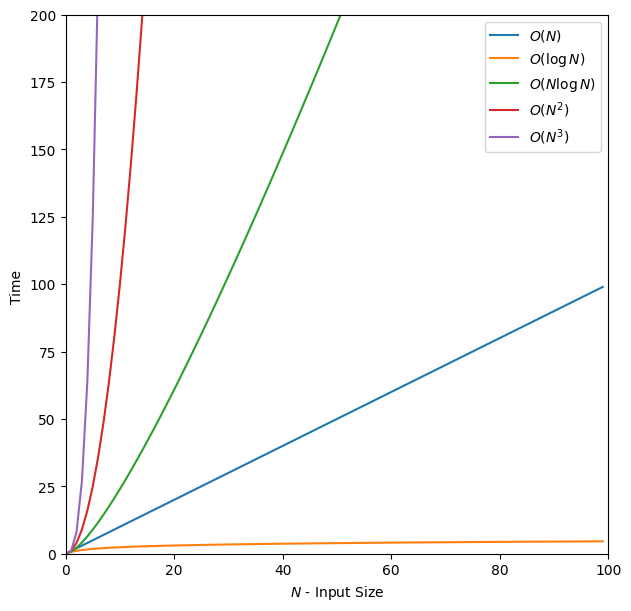

In [102]:
import matplotlib.pyplot as plt
N = range(100)
fig, ax = plt.subplots(figsize=(7, 7))

bigO_N = N
bigO_logN = [np.log(xx + 1) for xx in N]
bigO_NlogN = [xx * np.log(xx + 1) for xx in N]
bigO_Nsquared = [xx * xx for xx in N]
bigO_Ncubed = [xx ** 3 for xx in N]

ax.plot(N, bigO_N, label='$O(N)$')
ax.plot(N, bigO_logN, label='$O(\log N)$')
ax.plot(N, bigO_NlogN, label='$O(N \log N)$')
ax.plot(N, bigO_Nsquared, label='$O(N^2)$')
ax.plot(N, bigO_Ncubed, label='$O(N^3)$')

plt.xlim([0, 100])
plt.ylim([0, 200])
plt.xlabel("$N$ - Input Size")
plt.ylabel("Time ")

ax.legend()